In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

In [2]:
houseData = pd.read_csv("train.csv")

In [5]:
X = pd.DataFrame(houseData[["GrLivArea", "GarageArea"]])

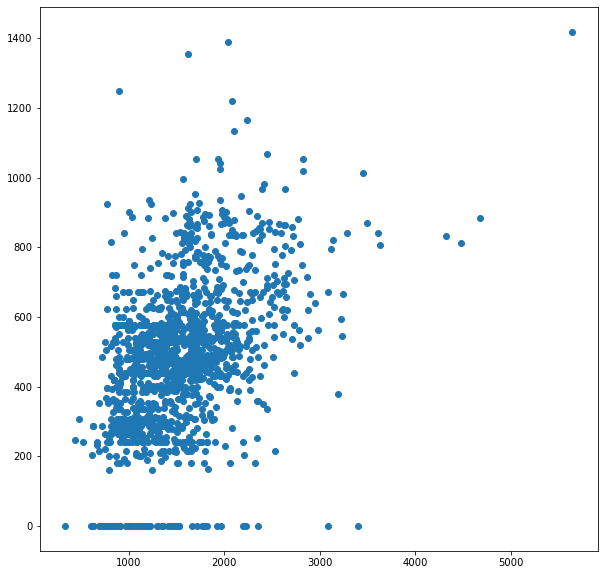

In [7]:
f, axes = plt.subplots(1, 1, figsize=(10, 10))
plt.scatter(x="GrLivArea", y="GarageArea", data=X)

In [8]:
from sklearn.cluster import KMeans

In [9]:
num_clust = 3
kmeans = KMeans(n_clusters = num_clust)
kmeans.fit(X)

KMeans(n_clusters=3)

In [27]:
print("Features", "\tGrLivArea", "\tGarageArea")
print()

for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end=" \t")
    print()
    
print("\n", kmeans.cluster_centers_)
print("这里的enumerate是为了获取索引")
    

Features 	GrLivArea 	GarageArea

Cluster 0:	1699.11 	522.12 	
Cluster 1:	1086.74 	375.3 	
Cluster 2:	2577.98 	683.8 	

 [[1699.11196319  522.11503067]
 [1086.74237805  375.2972561 ]
 [2577.98026316  683.79605263]]
这里的enumerate是为了获取索引


      GrLivArea  GarageArea Cluster
0          1710         548       0
1          1262         460       1
2          1786         608       0
3          1717         642       0
4          2198         836       2
...         ...         ...     ...
1455       1647         460       0
1456       2073         500       0
1457       2340         252       2
1458       1078         240       1
1459       1256         276       1

[1460 rows x 3 columns]
这里的Categorical相当于在原DataFrame上添加类别信息
<class 'numpy.ndarray'>
<class 'pandas.core.arrays.categorical.Categorical'>


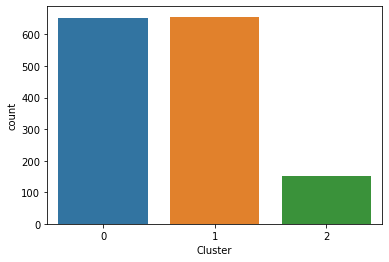

In [33]:
labels = kmeans.predict(X)

X_labeled = X.copy()
X_labeled["Cluster"] = pd.Categorical(labels)
# X_labeled["Cluster"] = labels

print(X_labeled)

sb.countplot(X_labeled["Cluster"])

print("这里的Categorical相当于在原DataFrame上添加类别信息")
print(type(labels))
print(type(pd.Categorical(labels)))

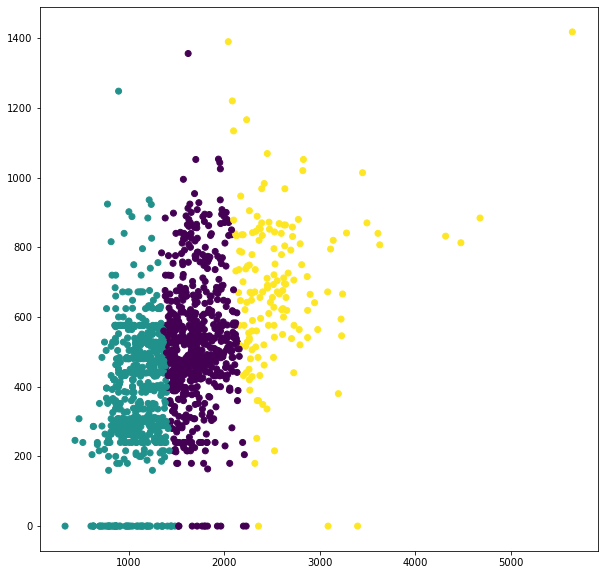

In [23]:
f, axes = plt.subplots(1, 1, figsize=(10, 10))
plt.scatter(x="GrLivArea", y="GarageArea", c="Cluster", cmap="viridis", data=X_labeled)

In [39]:
print("Within Cluster Sum of Squares: ", kmeans.inertia_)

Within Cluster Sum of Squares:  140815707.31475866


In [24]:
from sklearn.neighbors import LocalOutlierFactor

In [34]:
num_neighbors = 20
cont_fraction = 0.05

lof = LocalOutlierFactor(n_neighbors = num_neighbors, contamination = cont_fraction)

lof.fit(X)

LocalOutlierFactor(contamination=0.05)

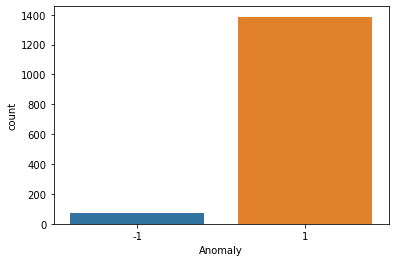

In [35]:
labels = lof.fit_predict(X)

X_labeled = X.copy()
X_labeled["Anomaly"] = pd.Categorical(labels)

sb.countplot(X_labeled["Anomaly"])

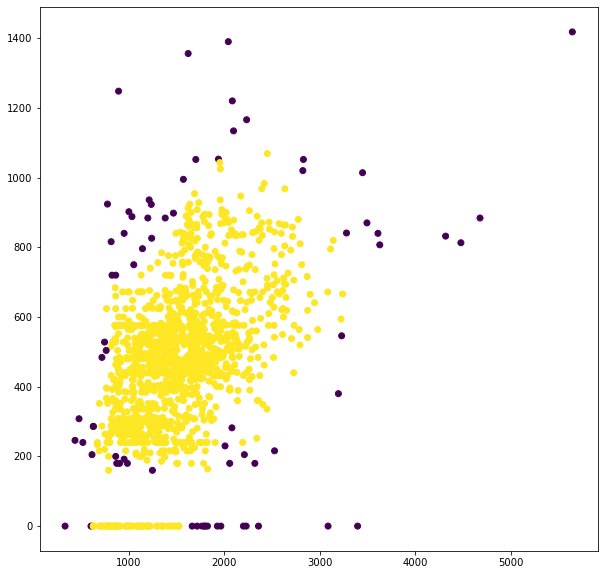

In [38]:
f, axes = plt.subplots(1, 1, figsize=(10, 10))
plt.scatter(x="GrLivArea", y="GarageArea", c="Anomaly", cmap="viridis", data=X_labeled)

In [40]:
from sklearn.cluster import KMeans

In [45]:
X = pd.DataFrame(houseData[["GrLivArea", "GarageArea"]])

init_algo = 'k-means++'

min_clust = 1
max_clust = 40

within_ss = []
for num_clust in range(min_clust, max_clust + 1):
    kmeans = KMeans(n_clusters = num_clust, init = init_algo, n_init = 20)
    kmeans.fit(X)
    within_ss.append(kmeans.inertia_)

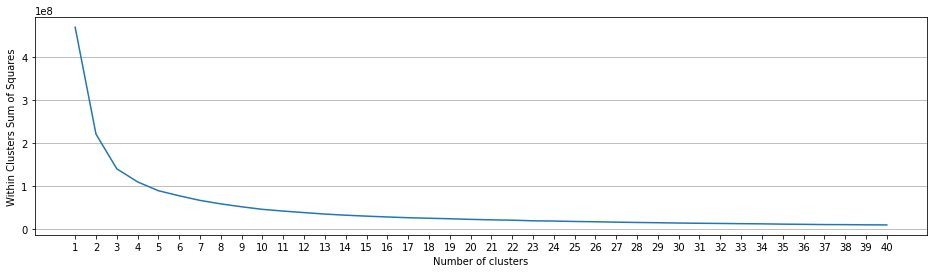

In [57]:
f, axes = plt.subplots(1, 1, figsize=(16, 4))
plt.plot(range(min_clust, max_clust + 1), within_ss)
plt.xlabel("Number of clusters")
plt.ylabel("Within Clusters Sum of Squares")
plt.xticks(np.arange(min_clust, max_clust + 1, 1.0))
plt.grid(which="major", axis="y")
plt.show()

In [68]:
num_clust = 4
init_algo = "k-means++"

kmeans = KMeans(n_clusters = num_clust, init = init_algo, n_init = 20)

kmeans.fit(X)

print("Features", "\tGrLivArea", "\tGarageArea")
print()

for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end =" \t")
    print()
print()
    
print("Within Clusters Sum of Squares: ", kmeans.inertia_)

Features 	GrLivArea 	GarageArea

Cluster 0:	1516.34 	479.1 	
Cluster 1:	2856.35 	708.44 	
Cluster 2:	2013.88 	600.96 	
Cluster 3:	1015.82 	355.1 	

Within Clusters Sum of Squares:  110334296.85486747


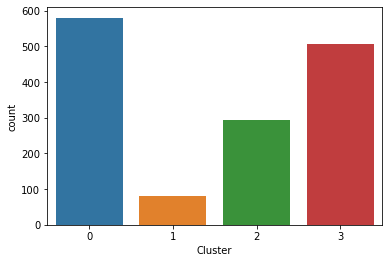

In [69]:
labels = kmeans.predict(X)

X_labeled = X.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

sb.countplot(X_labeled["Cluster"])

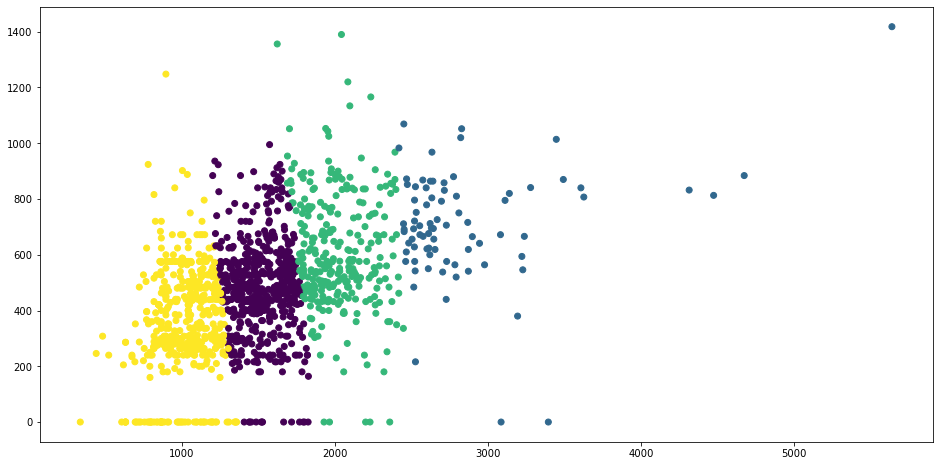

In [74]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(x="GrLivArea", y="GarageArea", c="Cluster", data=X_labeled, cmap="viridis")

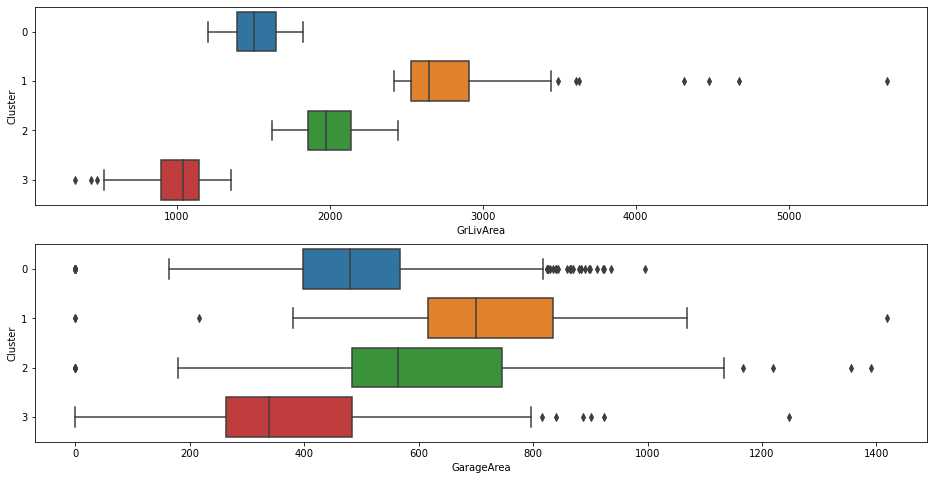

In [75]:
f, axes = plt.subplots(2, 1, figsize=(16, 8))

sb.boxplot(x="GrLivArea", y="Cluster", data=X_labeled, ax=axes[0])
sb.boxplot(x="GarageArea", y="Cluster", data=X_labeled, ax=axes[1])